# Homework Series 2

![](task1.png)

## Problem 1.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

% matplotlib inline

In [2]:
# Set hyperparameters
n_samples = 500

min_var = 0.1
max_var = 2.5
steps = 10
var_set = np.linspace(min_var, max_var, steps)

min_k = 0
mak_k = 4
k_set = range(min_k, mak_k)

split = 0.8

In [3]:
def train_test_split(X, Y, split=0.8):
    n_samples = len(X)
    n_train = int(n_samples * split)
    idx = np.random.permutation(n_samples)
    train_idx, test_idx = idx[:n_train], idx[n_train:]
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    return X_train, X_test, Y_train, Y_test

def cross_val_split(X, n_folds=10):
    n_samples = len(X)
    assert n_samples >= n_folds
    fold_size = int(n_samples / n_folds)
    idx = np.random.permutation(n_samples)[:fold_size*n_folds]
    idx = np.reshape(idx, (n_folds,-1))
    folds = []
    for i in range(n_folds):
        train_idx = np.hstack(idx[np.delete(range(n_folds), i)])
        test_idx = idx[i]
        folds.append([train_idx, test_idx])
    return folds
    
def loss(X, Y, p):
    Y_pred = p(X)
    return np.sum((Y - Y_pred)**2)

def fit_poly(X, Y, k=0):
    p = np.poly1d(np.polyfit(X, Y, 2*k + 1))
    return p

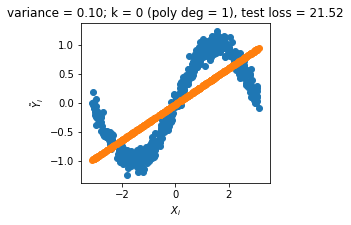

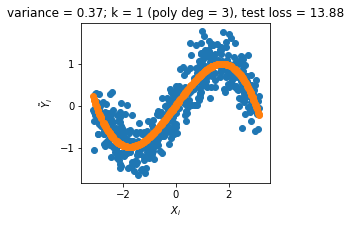

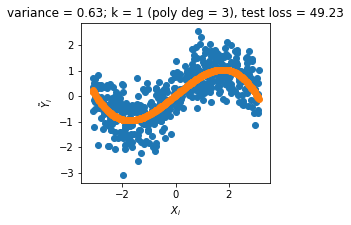

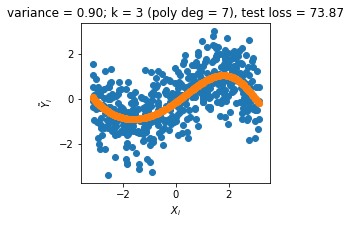

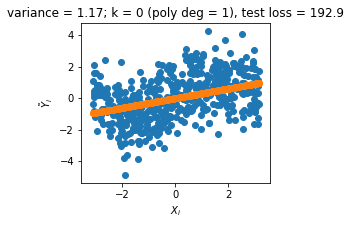

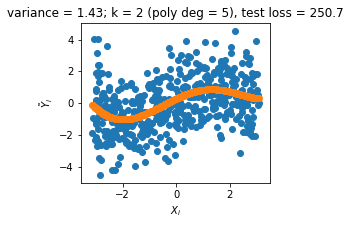

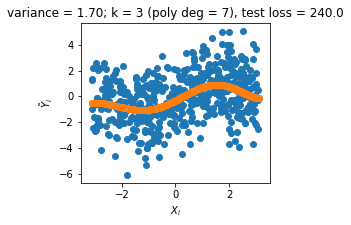

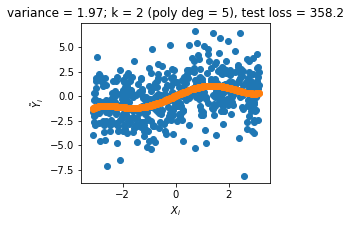

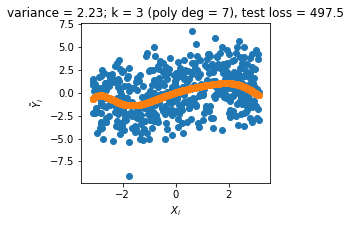

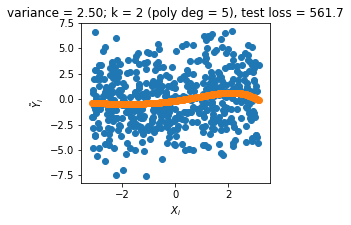

In [11]:
# Experiment
# Iterate over variations

for i in range(len(var_set)):
    var = var_set[i]
    # Generate data
    X= 2 * np.pi * np.random.rand(n_samples) - np.pi
    Y= np.sin(X) + var * np.random.randn(n_samples)
    # Split in train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, split)
    # Iterate over k parameters
    k_scores = []
    for k in k_set:
        scores = []
        folds = cross_val_split(X_train, 10)
        # 10-fold cross-validation
        for train_idx, test_index in folds:
            fold_X_train, fold_X_test = X_train[train_idx], X_train[test_index]
            fold_Y_train, fold_Y_test = Y_train[train_idx], Y_train[test_index]
            p = fit_poly(fold_X_train, fold_Y_train)
            cost = loss(fold_X_test, fold_Y_test, p)
            scores.append(cost)
        k_score = np.average(scores)
        k_scores.append([k, k_score])
    # Find best k for current variation
    k_scores.sort(key=lambda x: x[1])
    best_k, best_score = k_scores[0][0], k_scores[0][1]
    # Fit polynomial
    best_p = fit_poly(X_train, Y_train, best_k)
    # Calculate prediction and loss
    Y_pred = best_p(X)
    k_loss = loss(X_test, Y_test, best_p)
    # Plot polynomial vs complete data set
    fig = plt.figure(figsize=(40,10))
    plt.subplot(3, len(var_set) , i+1)
    plt.scatter(X, Y)
    plt.scatter(X, Y_pred)
    plt.title("variance = {0:.2f}; k = {1} (poly deg = {2}), test loss = {3:.4}".format(var,
                                                                         best_k,
                                                                         2*best_k+1,
                                                                         k_loss))
    plt.xlabel("$X_i$")
    plt.ylabel("$\~{Y}_i$")
plt.show()